In [1]:
import torch
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Type, Dict, Any

In [2]:
torch.manual_seed(0)
np.random.seed(0)

In [3]:
class Perceptron(torch.nn.Module):
    
    def __init__(self, 
                 input_resolution: Tuple[int, int] = (28, 28),
                 input_channels: int = 1, 
                 hidden_layer_features: List[int] = [256, 256, 256],
                 activation: Type[torch.nn.Module] = torch.nn.Tanh,
                 num_classes: int = 10):
        
        super().__init__()
        
        self.input_resolution = input_resolution
        self.input_channels = input_channels
        self.hidden_layer_features = hidden_layer_features
        self.activation = activation()
        self.num_classes = num_classes
        
        # Layers:
        self.fc1 = torch.nn.Linear(self.input_resolution[0] * self.input_resolution[1], 100)
        self.fc2 = torch.nn.Linear(100, self.num_classes)
        
    def forward(self, X : Type[torch.Tensor]) -> Type[torch.Tensor]:
        
        X = self.fc1(X)
        X = self.activation(X)
        
        X = self.fc2(X)
        output = F.softmax(X, dim = 1)
        
        return output

In [4]:
model = Perceptron()
print(model)
print('Total number of trainable parameters', 
      sum(p.numel() for p in model.parameters() if p.requires_grad))

Perceptron(
  (activation): Tanh()
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Total number of trainable parameters 79510


In [5]:
train_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
valid_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [6]:
train_dataset = torchvision.datasets.MNIST(root='./mnist', 
                                           train=True, 
                                           download=True,
                                           transform=train_transforms)

valid_dataset = torchvision.datasets.MNIST(root='./mnist', 
                                         train=False, 
                                         download=True, 
                                         transform=valid_transforms)

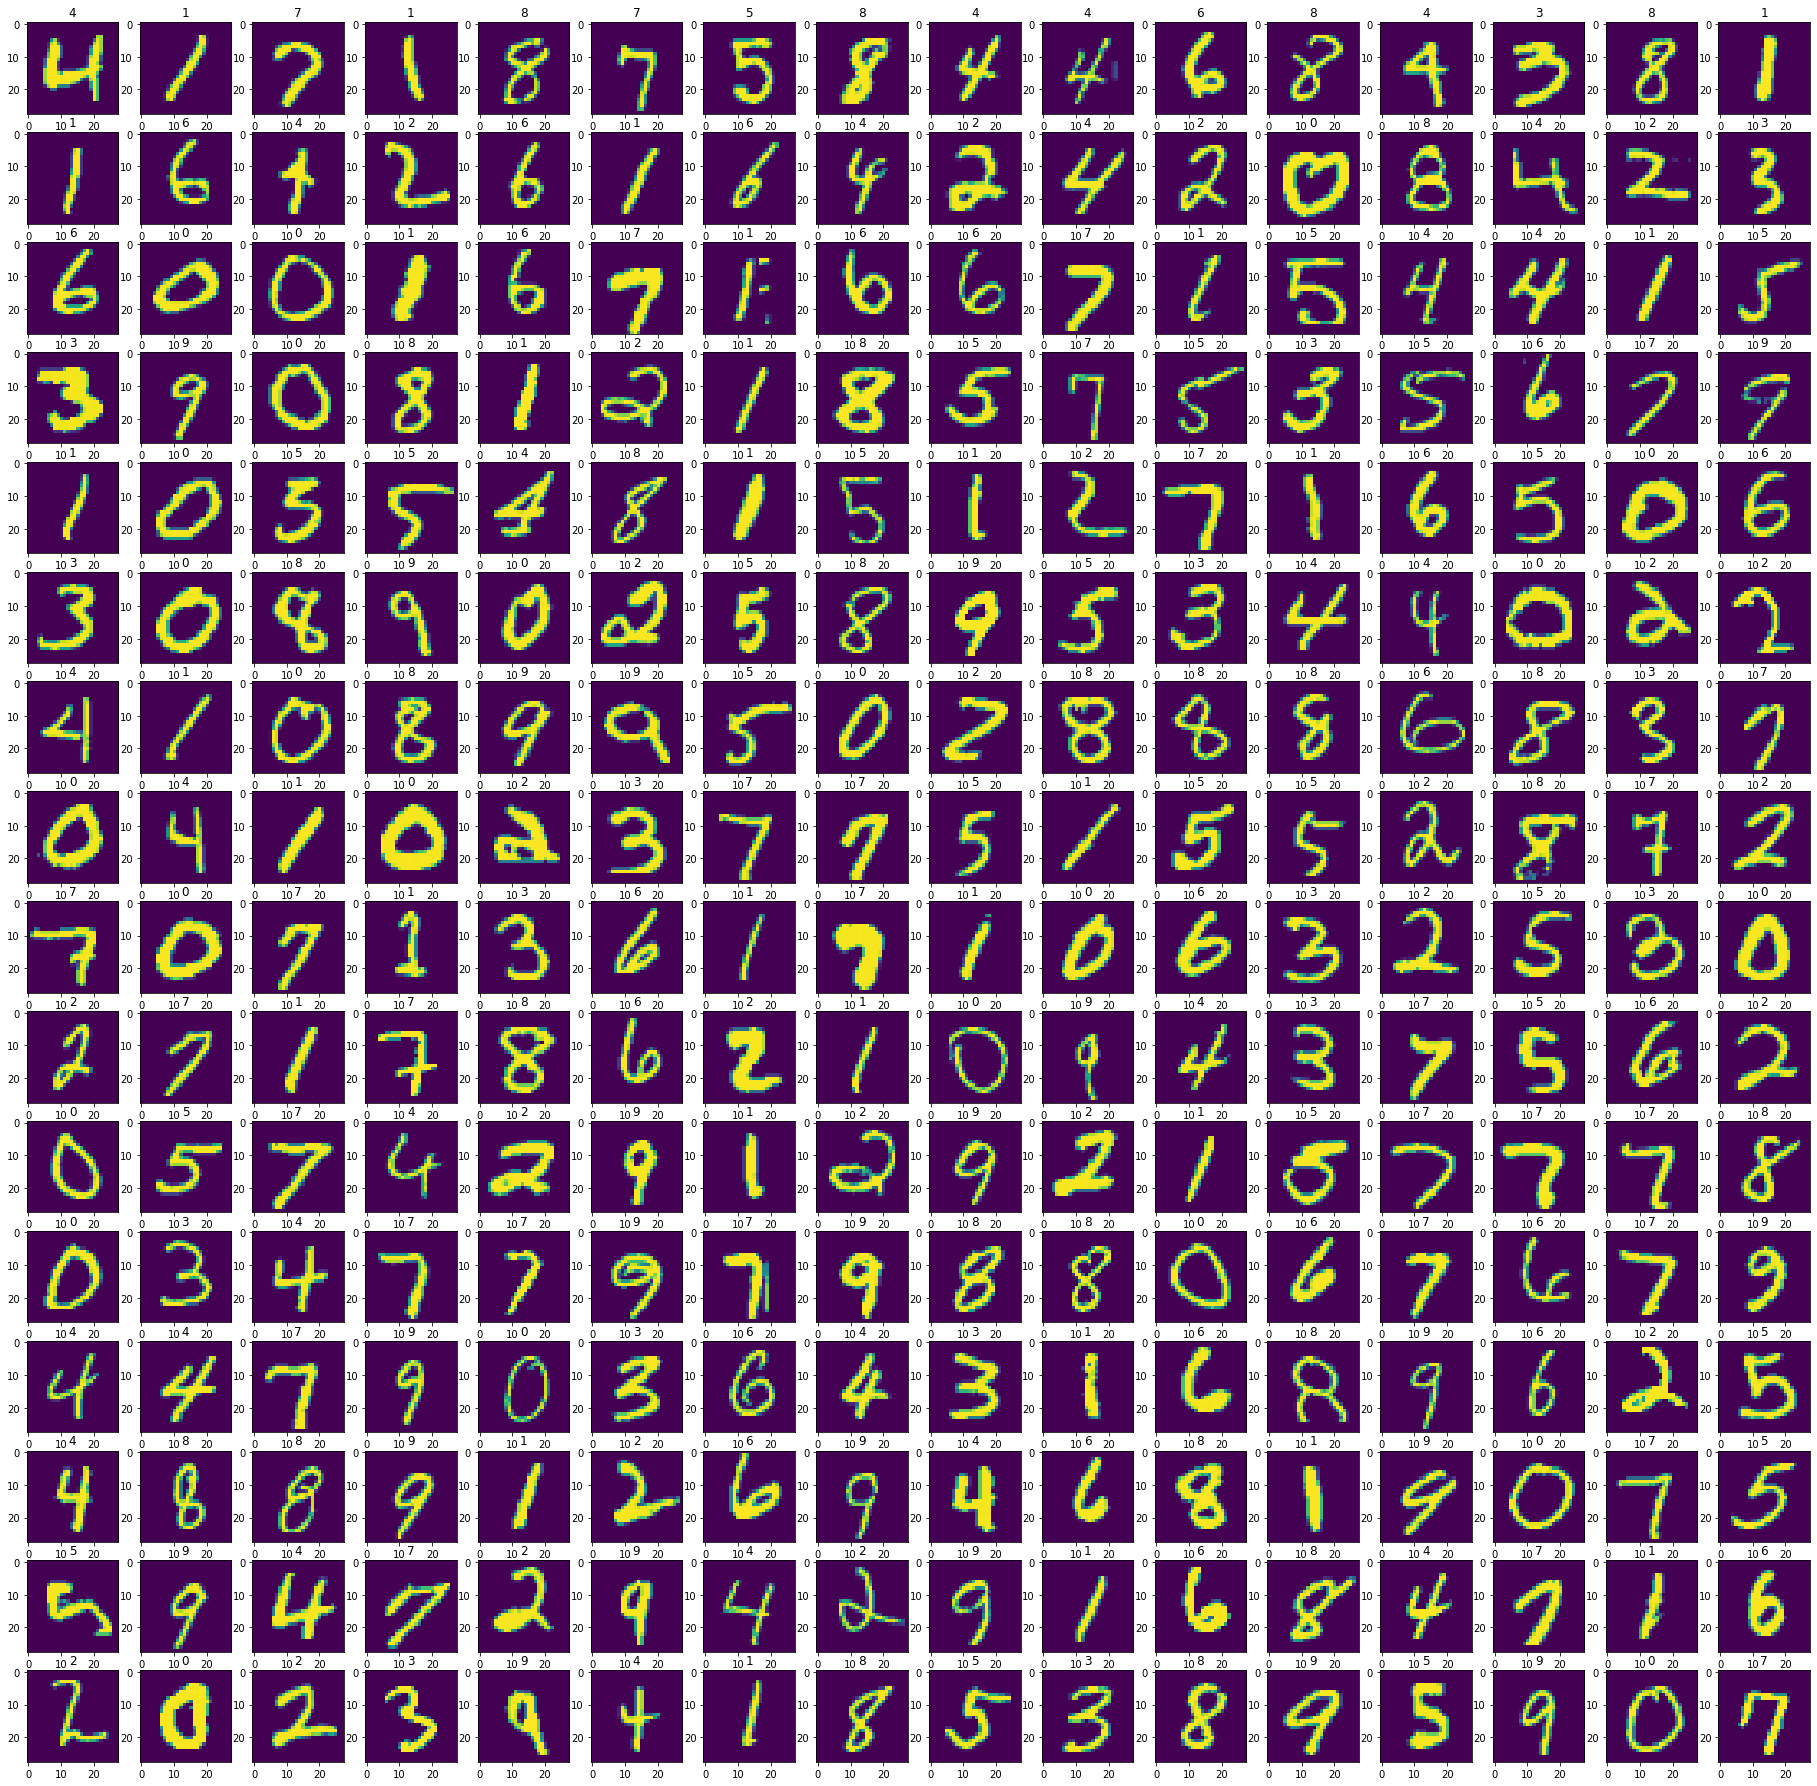

In [7]:
indices = np.random.randint(0, len(train_dataset), size=256)

fig, axes = plt.subplots(nrows=16, ncols=16, figsize=(32, 32))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        sample_index = indices[i*16+j]
        sample, label = train_dataset[sample_index]
        ax.imshow(sample.cpu().numpy().transpose(1, 2, 0))
        ax.set_title(label)

ValueError: only one element tensors can be converted to Python scalars